In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
df = pd.read_csv("dataFile.csv")

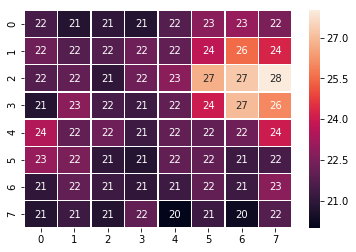

In [3]:
sample = df.iloc[0,1:].values.reshape(8,8).astype('float')
sns.heatmap(sample, linewidths=0.5, annot=True)

In [15]:
# pd.rolling_window(pd.DataFrame(sample[3:, 1:3]), window=3).count()
frames = []
for row in tqdm_notebook(df.iloc[:,1:].iterrows()):
    frames.append(np.array(row[1:]).reshape(8,8).astype('float'))
#     print(pd.Series(row[1:]).values.reshape(8,8))

In [8]:
frames

[array([[ 21.5 ,  20.75,  21.  ,  20.75,  21.75,  22.75,  23.  ,  22.5 ],
        [ 22.25,  21.75,  21.75,  22.25,  22.  ,  23.75,  25.5 ,  24.25],
        [ 21.75,  22.  ,  21.  ,  22.25,  22.75,  26.75,  27.25,  28.  ],
        [ 20.75,  22.75,  21.5 ,  21.25,  22.  ,  24.  ,  27.  ,  26.  ],
        [ 23.5 ,  22.  ,  22.25,  21.25,  22.  ,  22.  ,  22.25,  24.  ],
        [ 23.  ,  22.5 ,  21.  ,  20.75,  22.  ,  22.  ,  21.25,  21.5 ],
        [ 21.  ,  22.  ,  21.25,  21.  ,  21.25,  22.  ,  21.25,  22.75],
        [ 20.75,  21.25,  20.75,  22.  ,  20.  ,  21.25,  20.25,  21.75]]),
 array([[ 22.25,  21.75,  20.25,  22.25,  22.25,  23.  ,  22.5 ,  23.25],
        [ 22.5 ,  22.  ,  22.25,  21.  ,  22.5 ,  23.5 ,  24.75,  25.75],
        [ 22.5 ,  22.25,  21.5 ,  22.25,  22.25,  26.25,  27.5 ,  28.25],
        [ 21.  ,  21.  ,  22.25,  22.25,  22.25,  24.  ,  26.5 ,  27.  ],
        [ 22.25,  22.  ,  21.5 ,  22.25,  22.25,  21.5 ,  23.  ,  23.25],
        [ 22.75,  22.  ,  21.75,  21

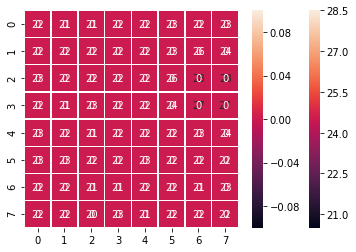

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.core.display import HTML
%matplotlib inline

fig = plt.figure()
data = frames[0]
# sns.heatmap(data, linewidths=0.5, annot=True)
def init():
    sns.heatmap(np.zeros((8, 8)), linewidths=0.5, annot=True)

def animate(i):
    plt.clf()
    data = frames[i]
    sns.heatmap(data, linewidths=0.5, annot=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=10, repeat=True)
HTML(anim.to_html5_video())